

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller 7: Clasificación con RNA</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA Y ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="../figs/Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>3 de junio de 2022</p>

## Enunciad

* Estudiar el uso de Redes Neuronales en scikit-learn.
    * Machine Learning with Neural Networks Using scikit-learn https://www.pluralsight.com/guides/
machine-learning-neural-networks-scikit-learn


* Estudiar, evaluar y discutir el desempeño de las Redes Neuronales Artificiales como clasificador, cuando son aplicadas a un conjunto de vectores de características como el del proyecto que está desarrollando para el curso.


## Desarrollo 1 Punto

# Perceptrón

* Una Epoca - por set de características

* Función de Activación: Escalón unitario
* Error: $\varepsilon = \bar{y} - y$, 

[[2.  3.  1. ]
 [8.  7.  1. ]
 [2.5 2.  1. ]
 [6.  4.  1. ]]
[[1.]
 [0.]
 [1.]
 [0.]]


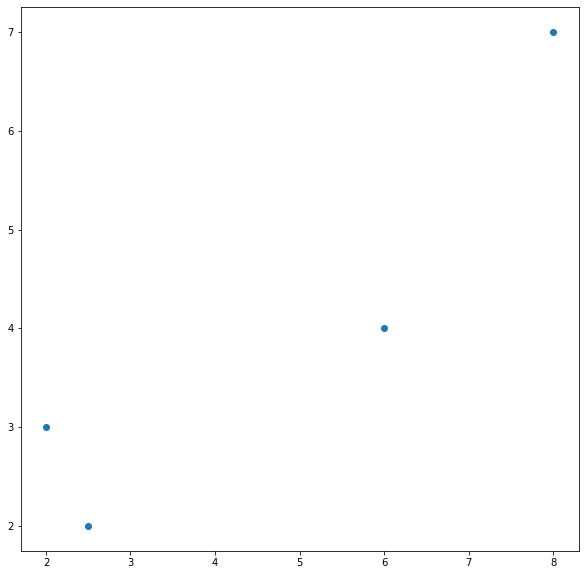

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

#==============================================
#  X: Input dataset matrix where each row is a training example
X = np.array([  [2.0,3.0,1],
                [8.0,7.0,1],
                [2.5,2.0,1],
                [6.0,4.0,1] ])

#X = np.array([  [2.0,1.0,1],
                #[8.5,9.0,1],
                #[8.0,2.0,1],
                #[1.5,8.5,1] ])

#==============================================
# output dataset   
# y: Output dataset matrix where each row is a training example
y = np.array([[1.0,0.0,1.0,0.0]]).T

print (X)
print (y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.scatter(X[:,0], X[:,1])
#plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)


W0:
[-0.16595599  0.44064899 -0.99977125]

------------------
m: 0
X[m]
[2. 3. 1.]
net
-0.009736270902065636
y_cal
0
error
[1.]
Delta
[2. 3. 1.]
W
[1.83404401e+00 3.44064899e+00 2.28749635e-04]

------------------
m: 1
X[m]
[8. 7. 1.]
net
38.75712373306609
y_cal
1
error
[-1.]
Delta
[-8. -7. -1.]
W
[-6.16595599 -3.55935101 -0.99977125]

------------------
m: 2
X[m]
[2.5 2.  1. ]
net
-23.53336325308381
y_cal
0
error
[1.]
Delta
[2.5 2.  1. ]
W
[-3.66595599e+00 -1.55935101e+00  2.28749635e-04]

------------------
m: 3
X[m]
[6. 4. 1.]
net
-28.232911246397155
y_cal
0
error
[0.]
Delta
[0. 0. 0.]
W
[-3.66595599e+00 -1.55935101e+00  2.28749635e-04]


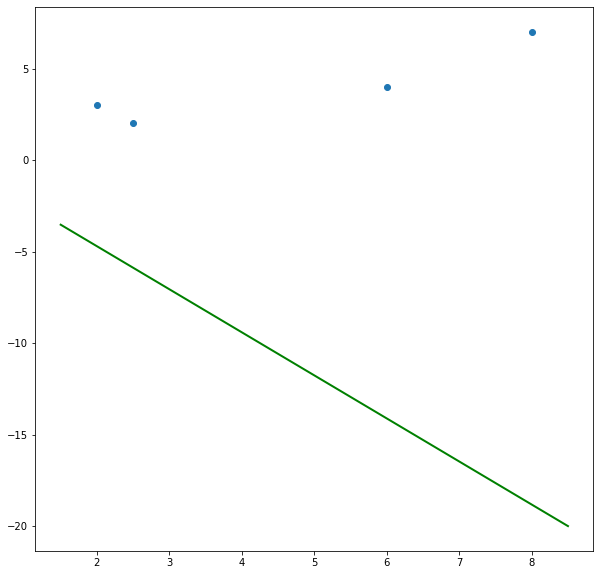

In [2]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

#==========================
# PASO 1

# initialize weights randomly with mean 0
# syn0: First layer of weights, Synapse 0, connecting l0 to l1.
W = 2*np.random.random((X.shape[1])) - 1
print ("\nW0:"); print (W)


#=========================
#PASO 2

for m in range(X.shape[0]):
    print ("\n------------------\nm: %d" %m)
    net = np.dot(X[m],W)
    print ("X[m]"); print (X[m])
    print ("net"); print (net)

#=========================
#PASO 3

    if net > 0: y_cal = 1
    else: y_cal = 0
    print ("y_cal"); print (y_cal)

#=========================
#PASO 4

    error = y[m] - y_cal
    print ("error");     print (error)

    Delta = error*X[m]
    print ("Delta");     print (Delta)

    # update weights
    W = W + Delta.T
    print ("W");     print (W)

#===========================================
#===========================================

y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

plt.scatter(X[:,0], X[:,1])
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)


W
[-10.16595599   9.44064899  12.00022875]

Epocas
11


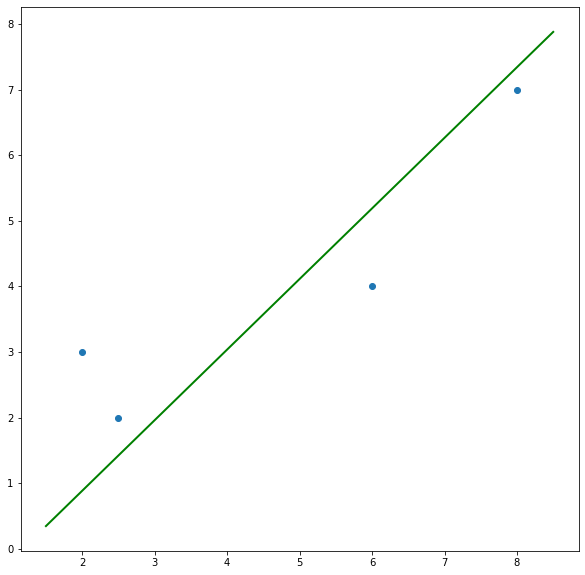

In [3]:
# MUCHAS ÉPOCAS

for j in range(100):
    
    Nerrors = 0
    #=========================
    #PASO 2
    for m in range(X.shape[0]):
        net = np.dot(X[m],W)
    #=========================
    #PASO 3
        if net > 0: y_cal = 1
        else: y_cal = 0
    #=========================
    #PASO 4
        error = y[m] - y_cal
        Delta = error*X[m]
        # update weights
        W = W + Delta.T      
        if error != 0: 
            Nerrors = Nerrors+1
    if Nerrors == 0: 
        break
    #===========================================
    #===========================================

print ("\nW");     print (W)
print ("\nEpocas")
print (j)
y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

plt.scatter(X[:,0], X[:,1])
#plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

# ADALINE

* Función de Activación: Identidad o función lineal
* Error: $\varepsilon = \frac{1}{2}(\bar{y}-y)^2$, 